자료 출처: Do it! BERT와 GPT로 배우는 자연어 처리   

# 트랜스포머(transformer)
    -> attention is all you need
- 트랜스포머(transformer)는 2017년 구글이 제안한 시퀀스-투-시퀀스(sequence-to-sequence) 모델   
- BERT나 GPT 같은 트랜스포머 기반 언어모델   

## 1 시퀀스-투-시퀀스(sequence-to-sequence) 
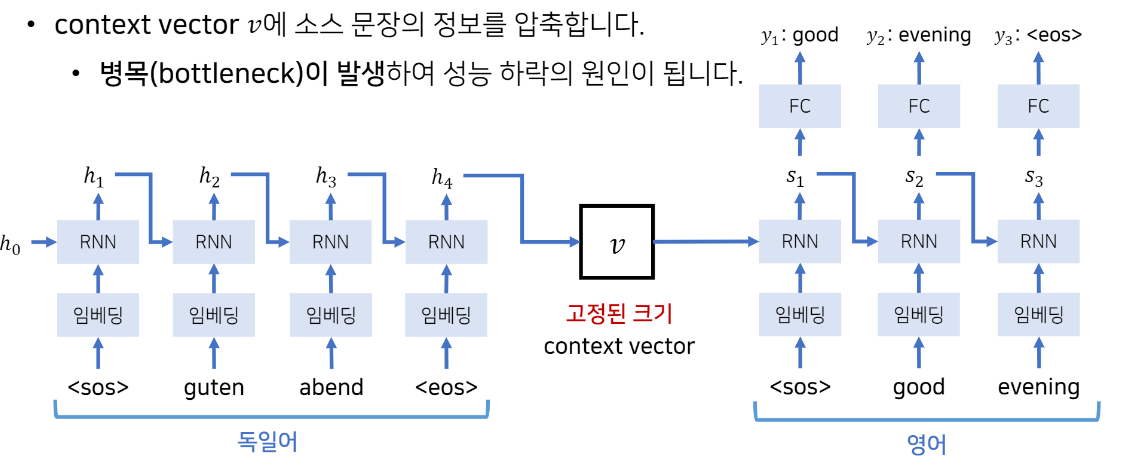
- NLP에서 시퀀스란 단어의 나열을 의미   
- 시퀀스-투-시퀀스는 특정 속성을 지는 시퀀스를 다른 속성의 시퀀스로 변환하는 작업을 의미   
    예) 기계 변역
    > 어제, 카페, 갔었어, 거기, 사람, 많더라 >    
    I, went, to, the, cafe, There, were, many, people, there

소스 시퀀스의 길이(6개)와 타깃 시퀀스의 길이(10개)의 길이가 달라도 해당 문장을 번역할 수 있다.   

## 2 인코더와 디코더
- 트랜스포머는 시퀀스-투-시퀀스 과제 수행에 특화된 모델  
- 기계 번역이 아니더라도, 시퀀스 속성이 다른 시퀀스로 변환하는 작업에서 효과적.  
   예) 기온의 시퀀스 → 태풍 발생 여부의 시퀀스   

- 시퀀스-투-시퀀스 과제를 수행하는 모델은 대개 인코더(encoder)와 디코더(decoder) 두 개 파트로 구성.   
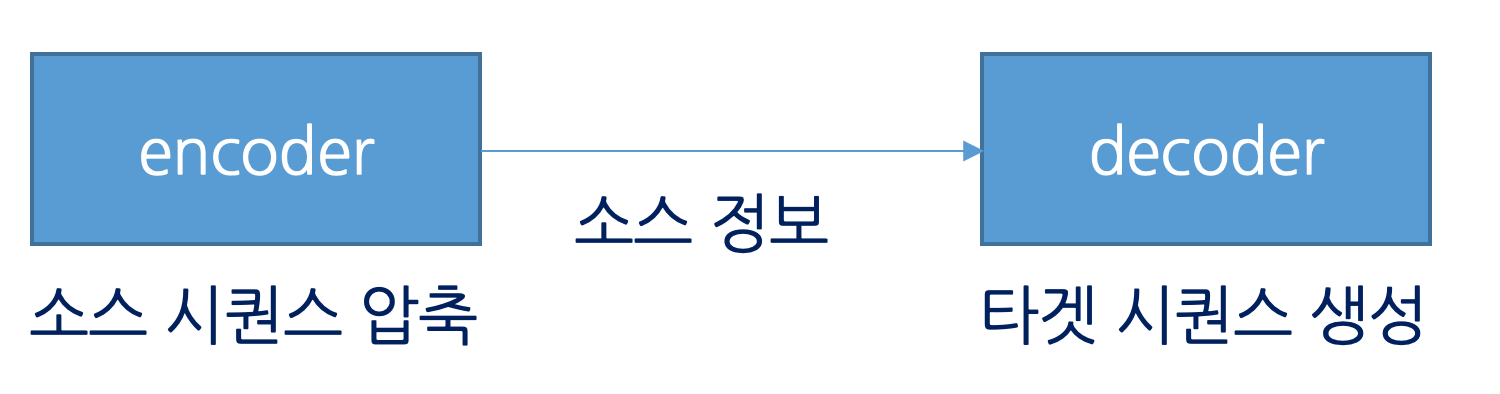

- 인코더는 소스 시퀀스의 정보를 압축해 디코더로 보내주는 역할을 담당.   
- 인코더가 소스 시퀀스 정보를 압축하는 과정을 인코딩(encoding)이라고 한다.
- 디코더는 인코더를 통해 수신한 __소스 정보__를 통해 타깃 시퀀스를 생성 이를 디코딩(decoding) 이라 한다.   

> 예) 기계번역에서는 인코더가 한국어 문장을 압축해 디코더에 보내고, 디코더는 이를 받아 영어로 번역
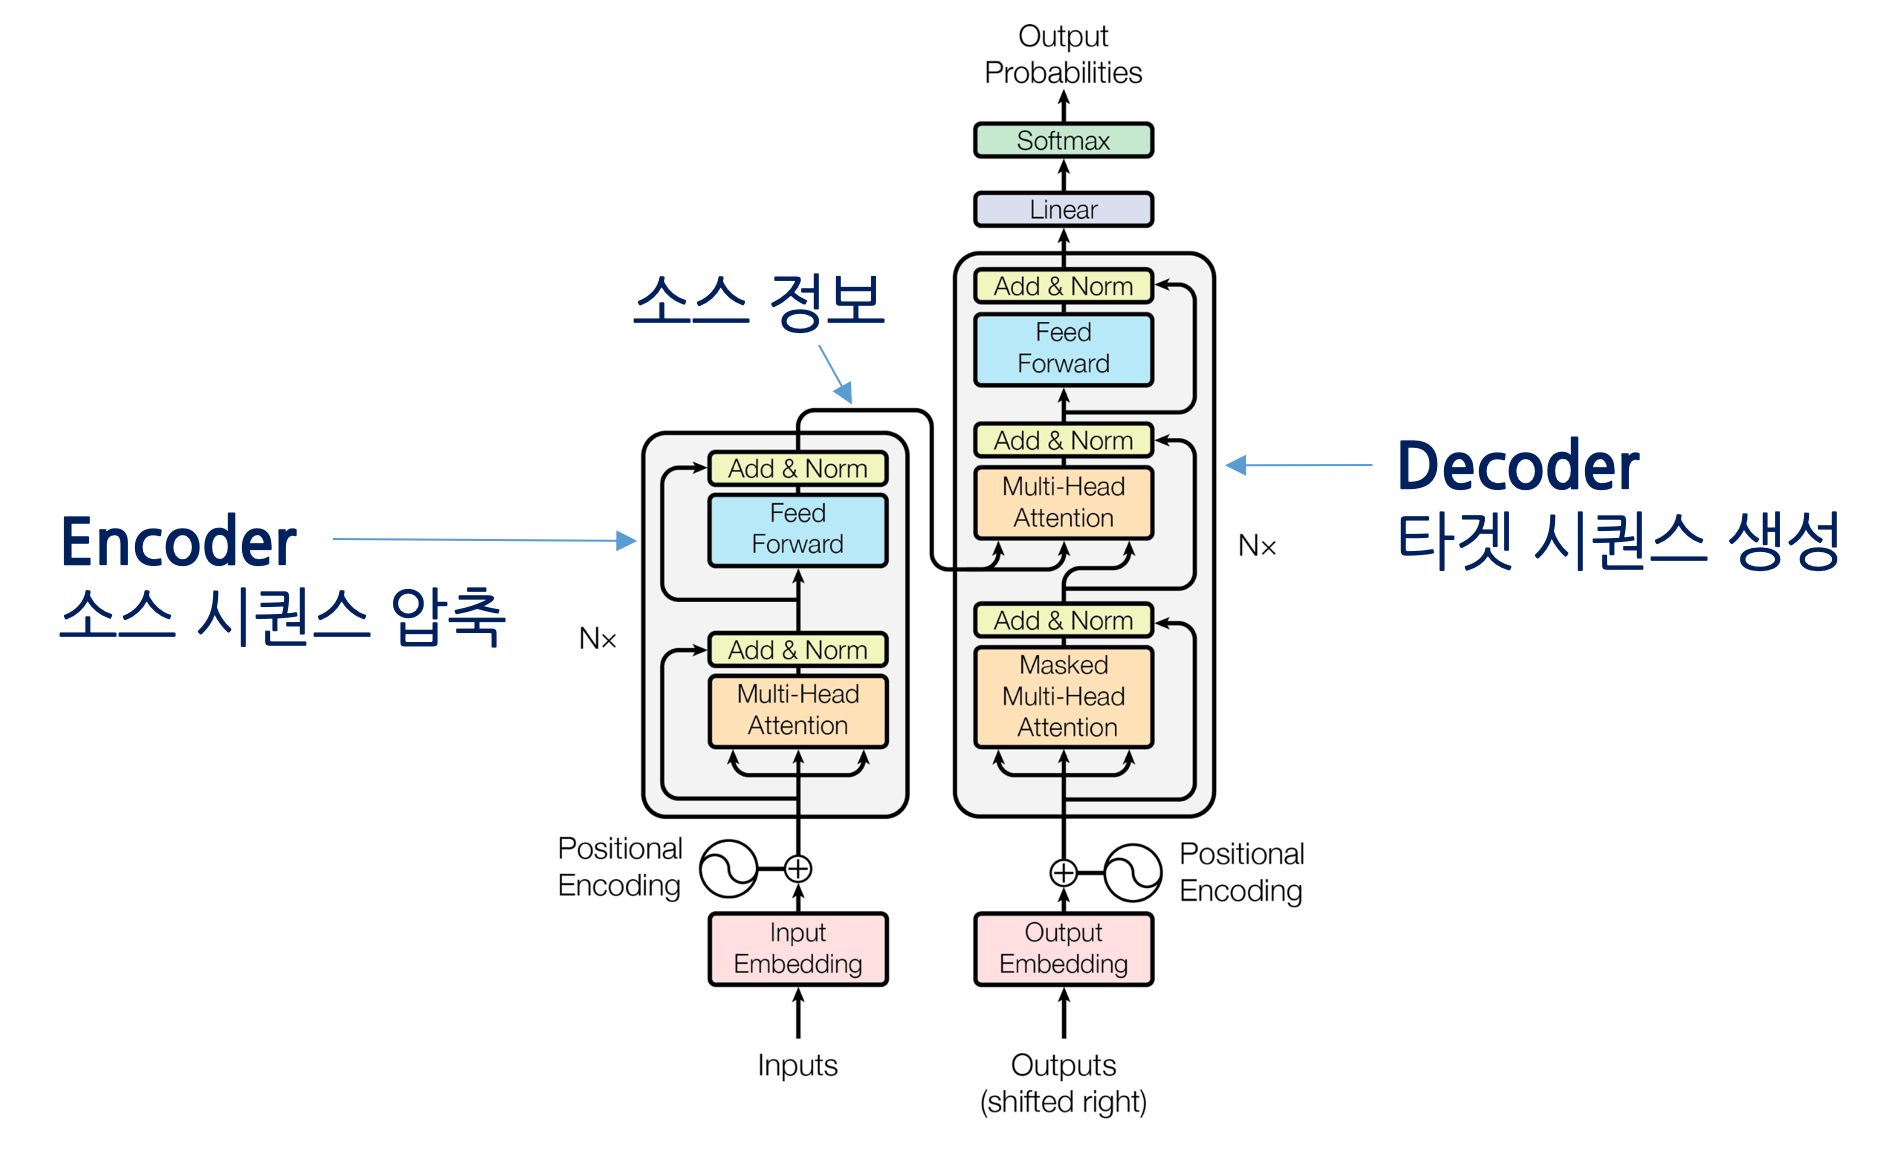

## 3 모델 학습과 인퍼런스
- 트랜스포머의 학습 방법
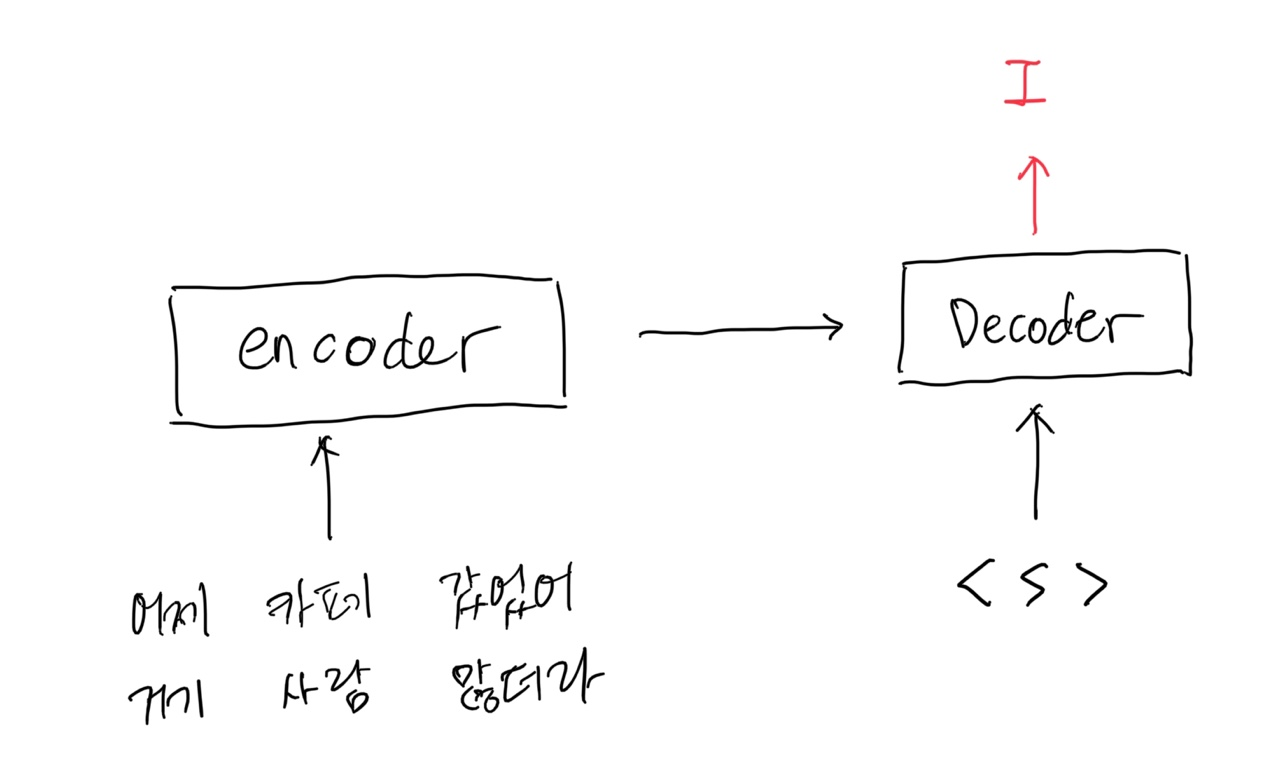

- 위 그림은 I를 맞춰야 하는 차례라 가정.   
- 입력 인코더는 ['어제', '카페', '갔었어', '거기', '사람' '많더라']와 같은 소스 시퀀스이고, 디코더 입력은 \<s>가 된다.   
- 인코더는 소스 시퀀스를 압축해 디코더로 보내고, 디코더는 받은 정보와 현재 디코더 입력을 감안해 다음 토큰 (I)를 맞춘다.   
- 트랜스포머의 최종 출력은 타깃 언어의 어휘 수 만큼의 차원으로 구성된 Vector로 반환하며, Vecter의 요소값은 모두 확률이다.
>예) 타깃 언어의 어휘가 총 3만개라고 가정해 보면 디코더 출력은 3만 차원의 벡터입니다. 이 벡터의 요솟값 3만 개는 각각은 확률이므로 0 이상 1 이하의 값을 가지며 모두 더하면 1
- 트랜스포머의 학습(train)은 인코더와 디코더 입력이 주어졌을 때 정답에 해당하는 단어의 확률 값을 높이는 방식으로 수행
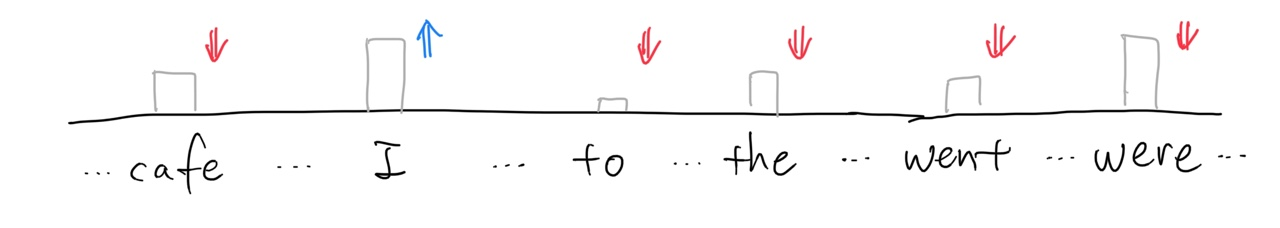
- 위 그림을 보면 모델은 이번 시점의 정답인 I에 해당하는 확률은 높이고 나머지 단어의 확률은 낮아지도록, 모델 전체를 갱신

- 다음으로 went를 맞힐 차례.
- 입력 시퀀스는 '\<s> I'
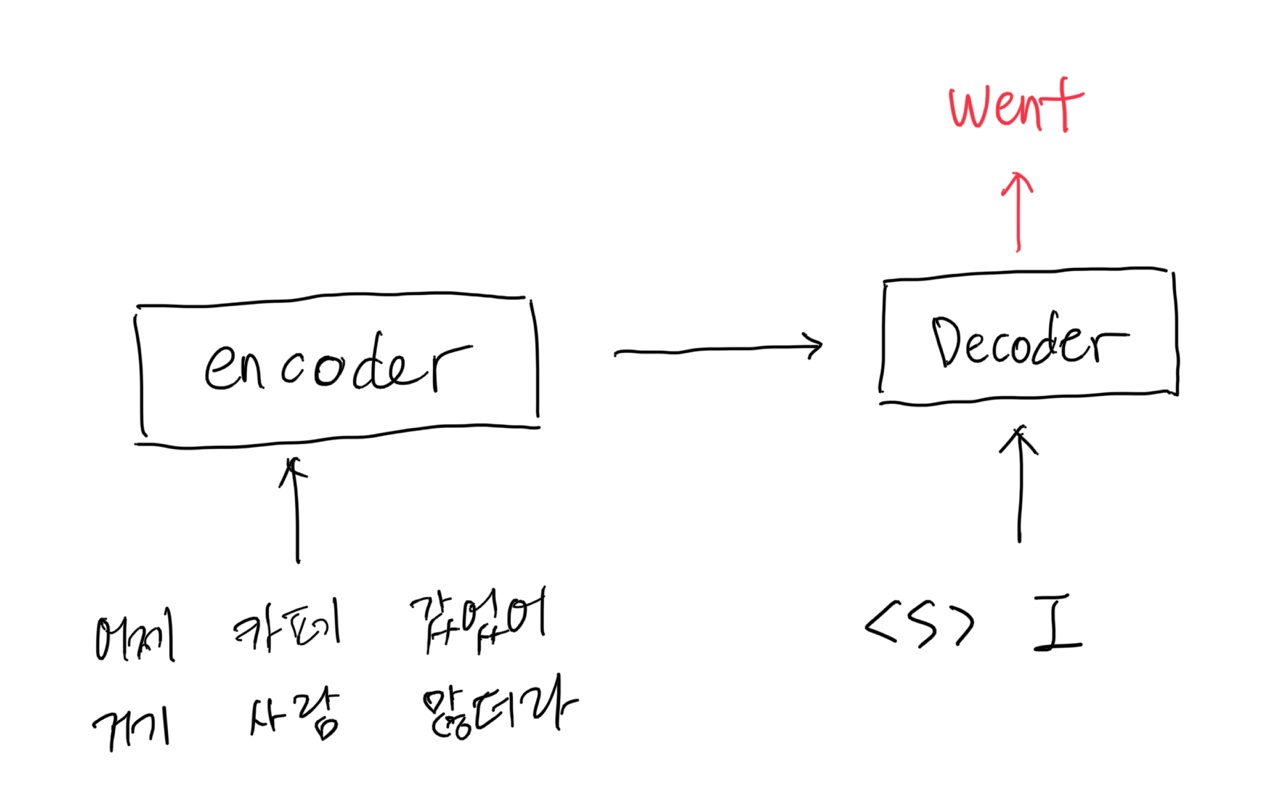
- 학습 중의 디코더 입력과 학습을 마친 후 모델을 실제 기계 번역에 사용할 때(인퍼런스)의 디코더 입력이 다르다.   
- 학습 종료 후 인퍼런스 때는 현재 디코더 입력에 직전 디코딩 결과를 사용   
> 예) 모델 학습이 약간 잘못 되어 인퍼런스 때 직전 디코더 출력이 I 대신 you라는 단어가 나왔다고 가정해 봅시다. 이 경우 디코더 입력은 \<s> you가 된다.

- 이 같은 상황에서 모델은 이번 시점의 정답인 went에 해당하는 확률을 높이고 나머지 단어의 확률은 낮아지도록 모델을 갱신.
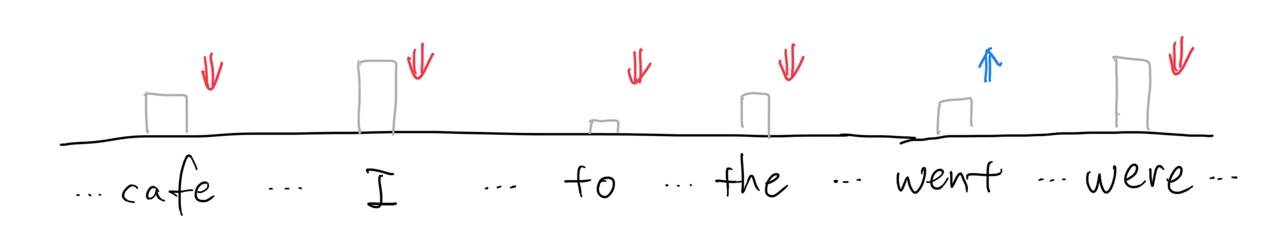

- 타깃 시퀀스 가운데 to를 맞출 경우
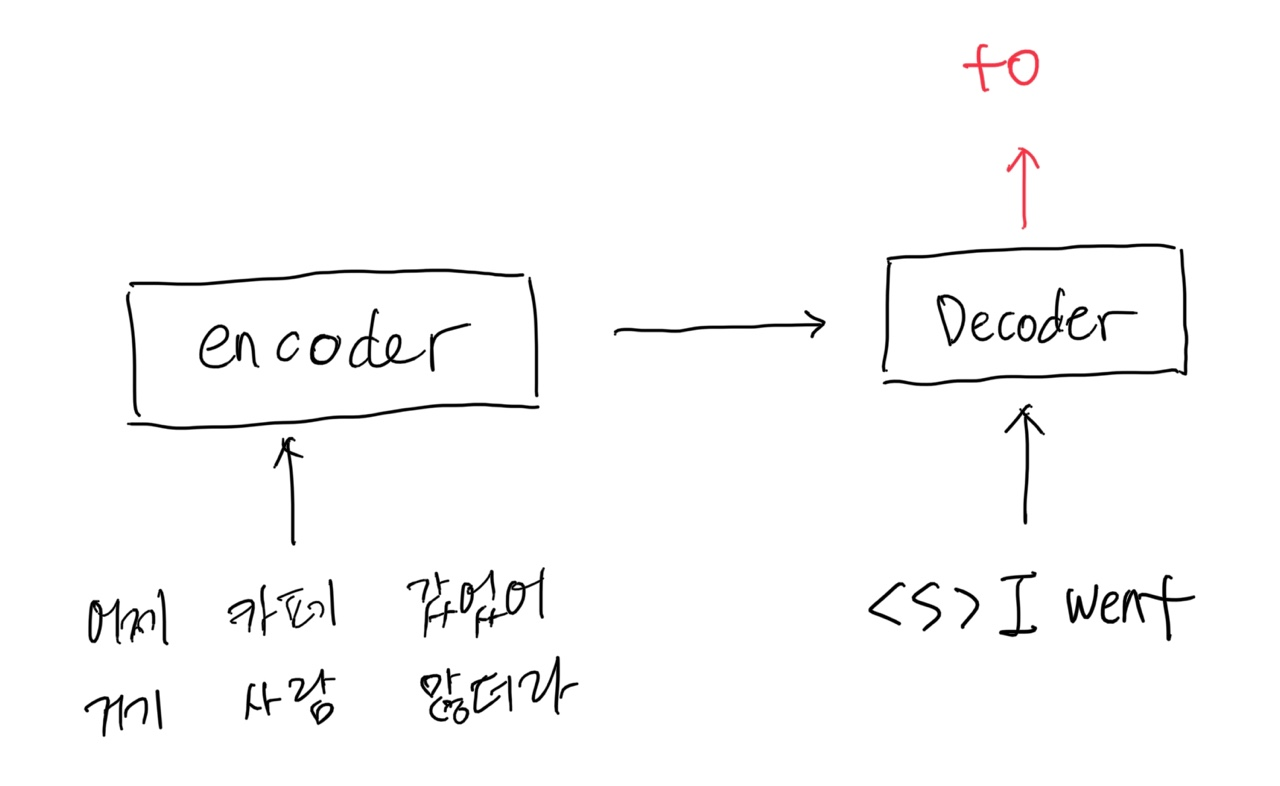
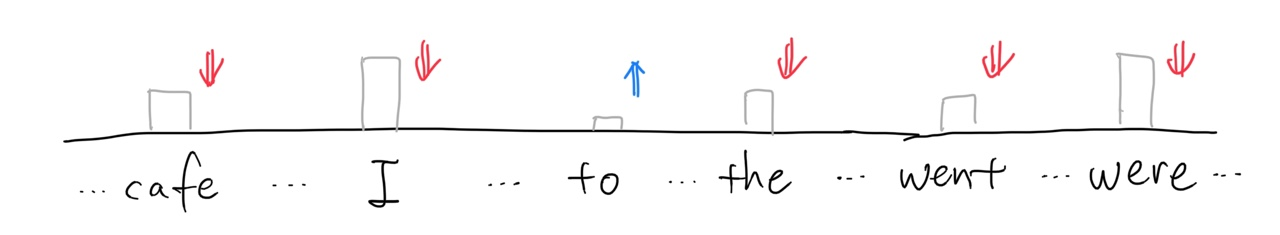

## 4 트랜스포머 블록

### 인코더
- 트랜스포머의 인코더 가운데 반복되는 요소를 떼어내 다시 나타낸 것
- 이런 구조를 블록(block) 혹은 레이어(layer)라고 한다.
- 트랜스포머의 인코더는 이같은 블록을 수십 개 쌓아서 구성
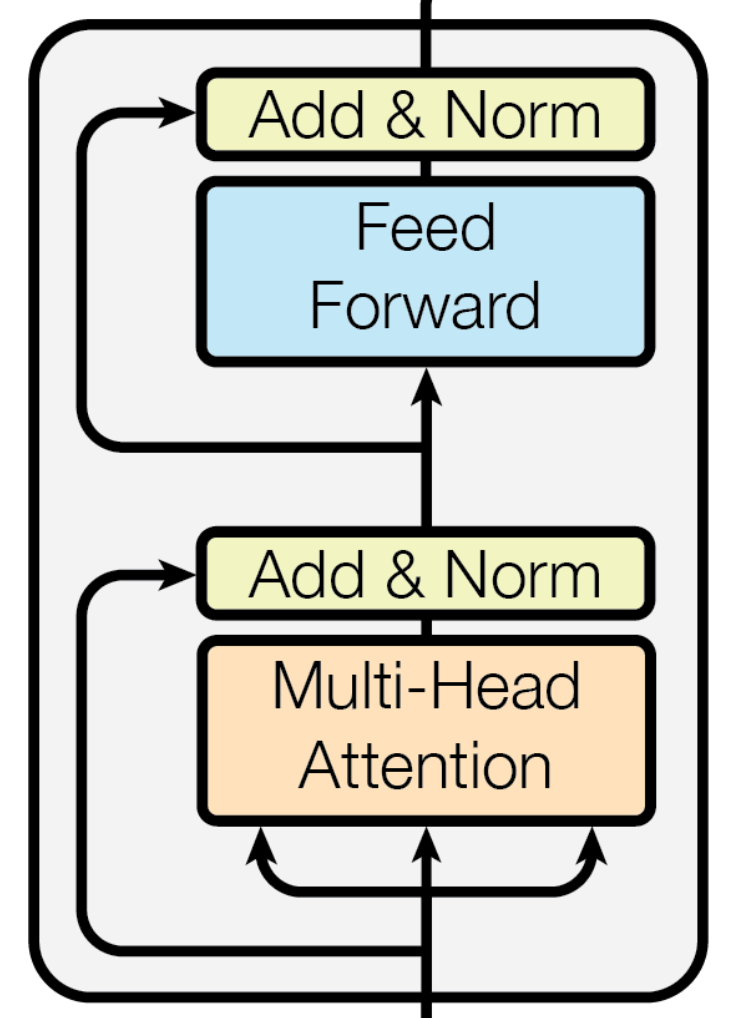

- 인코더 블록은 다음과 같은 세 가지 요소로 구성
    - 멀티 헤드 어텐션(Multi-Head Attention)
    - 피드포워드 뉴럴네트워크(FeedForward)
    - 잔차 연결 및 레이어 정규화(Add & Norm)

### 디코더
- 디코더 쪽 블록의 구조도 인코더 블록과 본질적으로는 다르지 않음
- 마스크를 적용한 멀티 헤드 어텐션(Masked Multi-Head Attention)이 인코더 쪽과 다르고, 인코더가 보내온 정보와 디코더 입력을 함께 이용해 멀티 헤드 어텐션을 수행하는 모듈이 추가
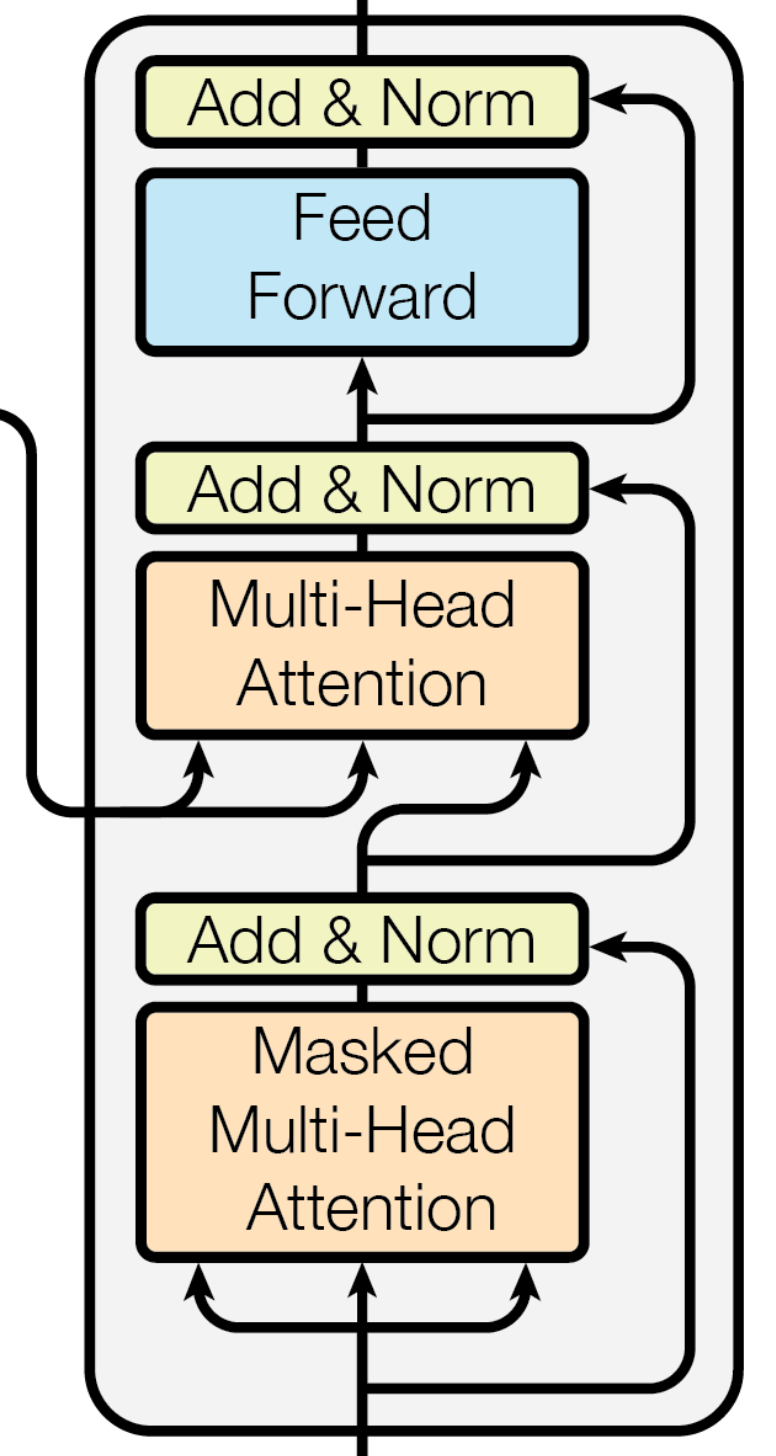
- 마스크를 적용한 멀티 헤드 어텐션(Masked Multi-Head Attention) 
- 멀티 헤드 어텐션(Multi-Head Attention)
- 피드포워드 뉴럴 네트워크(FeedForward) 
- 잔차 연결 및 레이어 정규화(Add & Norm)

### 셀프 어텐션(self attention)
- 트랜스포머 구조에서 멀티 헤드 어텐션은 셀프 어텐션(self attention)을 여러개로 동작하는 것이다.
-  어텐션(attention)은 시퀀스 입력에 수행하는 기계학습 방법의 일종
- 어텐션은 시퀀스 요소들 가운데 태스크 수행에 중요한 요소에 집중하고 그렇지 않은 요소는 무시해 태스크 수행 성능을 올린다.
- 어텐션은 기계 번역 과제에 처음 도입
    - 기계 번역에 어텐션을 도입한다면 타깃 언어를 디코딩할 때 소스 언어의 단어 시퀀스 가운데 디코딩에 도움되는 단어들 위주로 취사 선택해서 번역 품질을 향상시킬 수 있음.
    - 어텐션은 디코딩할 때 소스 시퀀스 가운데 중요한 요소만 추리는 역할을 한다.
- 셀프 어텐션이란, 말 그대로 자기 자신에 수행하는 어텐션 기법 입력 시퀀스 가운데 태스크 수행에 의미 있는 요소들 위주로 정보를 추출

#### 합성곱 신경망(Convolutional Neural Network, CNN)의 문제
- CNN은 합성곱 필터(convoltion filter)*를 이용해 시퀀스의 지역적인 특징을 잡아내는 모델
- 자연어는 기본적으로 시퀀스(단어 혹은 형태소의 나열)이고 특정 단어 기준 주변 문맥이 의미 형성에 중요한 역할을 하므로 CNN이 자연어 처리에서도 사용되고 있음.
- 아래 그림은 CNN이 문장을 어떻게 인코딩하는지 나타낸다.
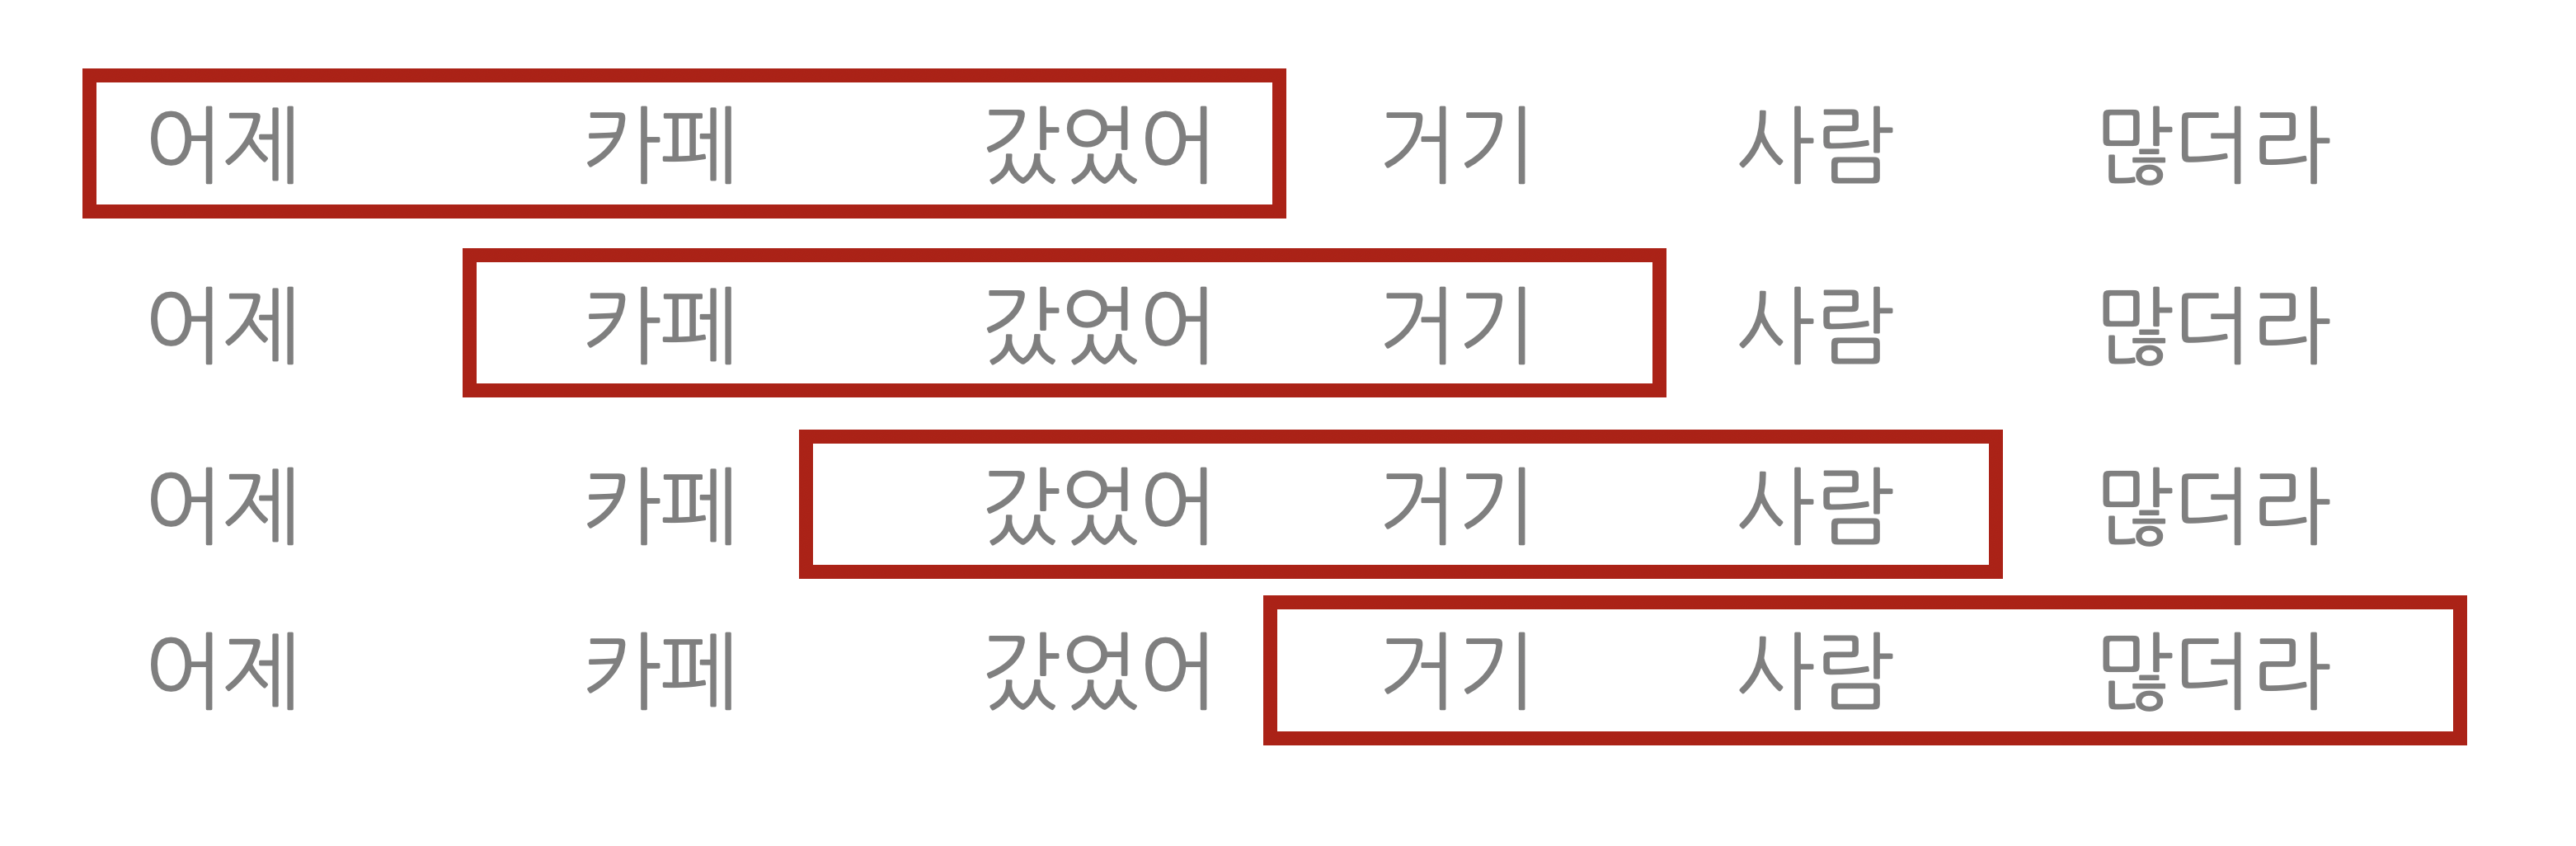
- CNN은 합성곱 필터 크기를 넘어서는 문맥은 읽어내기 어렵다는 단점이 있음

#### 순환 신경망(Recurrent Neural Network, RNN)의 문제
- RNN 역시 시퀀스 정보를 압축하는 데 강점이 있는 구조
- 소스 언어 시퀀스인 [어제, 카페, 갔었어, 거기, 사람, 많더라]를 인코딩해야 한다고 가정
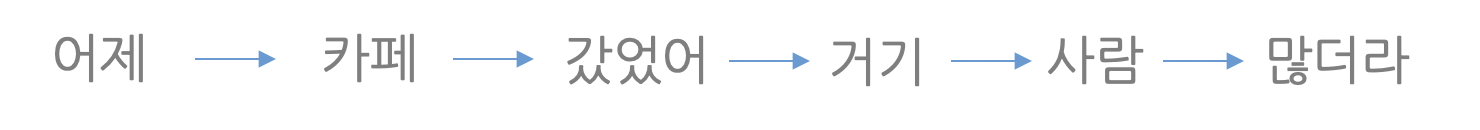
- RNN은 시퀀스 길이가 길어질 수록 정보 압축에 문제가 발생
- 오래 전에 입력된 단어는 잊어버리거나, 특정 단어 정보를 과도하게 반영해 전체 정보를 왜곡하는 경우가 발생

#### 어텐션
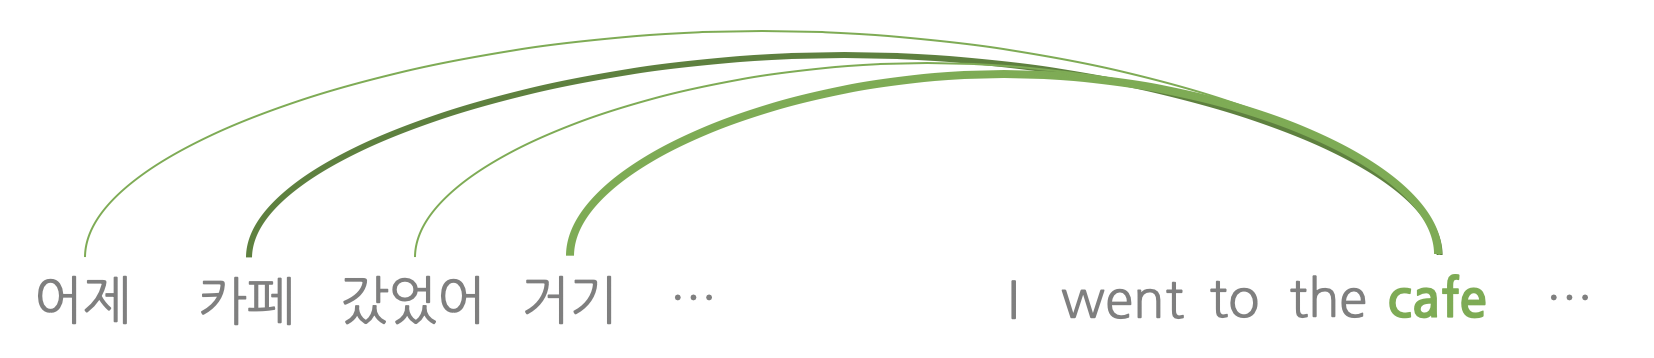


- 위 그림을 보면 'cafe'에 대응하는 소스 언어의 단어는 카페이고 이는 소스 시퀀스의 초반부에 등장한 상황
- 'cafe'라는 단어를 디코딩해야 할 때 카페를 반드시 참조해야 하는데, 어텐션이 없는 단순 RNN을 사용하면 워낙 초반에 입력된 단어라 모델이 잊었을 가능성이 높음.

- 어텐션은 이러한 문제점을 해결하기 위해 제안
- 디코더 쪽 RNN에 어텐션을 추가하는 방식
     - 어텐션은 디코더가 타깃 시퀀스를 생성할 때 소스 시퀀스 전체에서 어떤 요소에 주목해야 할지 알려주므로 '카페'가 소스 시퀀스 초반에 등장하거나 소스 시퀀스의 길이가 길어지더라도 번역 품질이 떨어지는 것을 방지

#### 셀프 에텐션
- 셀프 어텐션은 자기 자신에 수행하는 어텐션
- 아래 그림은 입력 시퀀스가 어제, 카페, 갔었어, 거기, 사람, 많더라일 때 거기라는 단어가 어떤 의미를 가지는지 계산하는 상황
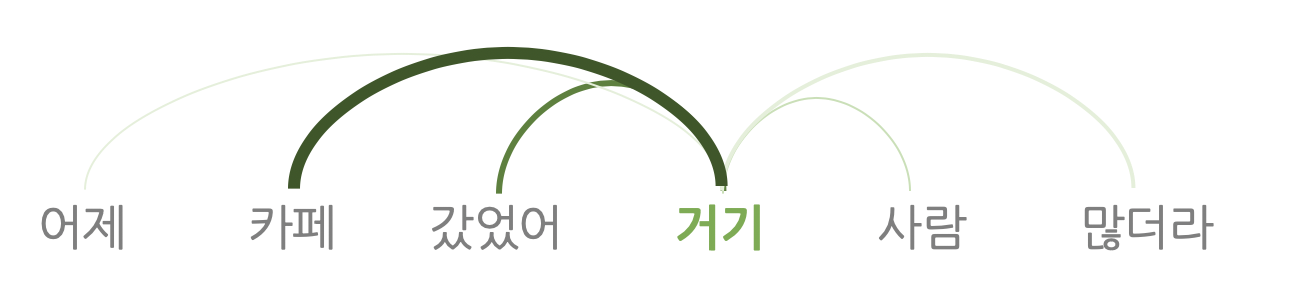

- 잘 학습된 셀프 어텐션 모델이라면 '거기'에 대응하는 장소는 '카페'라는 사실을 알아챌 수 있을 것
- 뿐만 아니라 '거기'는 '갔었어'와도 연관이 있음을 확인할 수 있음.
- 트랜스포머 인코더 블록 내부에서는 이처럼 '거기'라는 단어를 인코딩할 때 '카페', '갔었어'라는 단어의 의미를 강조해서 반영


- 셀프 어텐션 수행 대상은 입력 시퀀스 전체
    - '어제'-전체 입력 시퀀스, '갔었어'-전체 입력 시퀀스, '사람'-전체 입력 시퀀스, '많더라'-전체 입력 시퀀스 모두 어텐션 계산

- 개별 단어와 전체 입력 시퀀스를 대상으로 어텐션 계산을 수행해 문맥 전체를 고려하기 때문에 지역적인 문맥만 보는 CNN 대비 강점
- 모든 경우의 수를 고려(단어들 서로가 서로를 1대 1로 바라보게 함)하기 때문에 시퀀스 길이가 길어지더라도 정보를 잊거나 왜곡할 염려가 없기 때문에 RNN의 단점이 극복 됨.

- 어텐션과 셀프 어텐션의 주요 차이
    - 어텐션은 소스 시퀀스 전체 단어들(어제, 카페, …, 많더라)과 타깃 시퀀스 단어 하나(cafe) 사이를 연결하지만 셀프 어텐션은 입력 시퀀스 전체 단어들 사이를 연결
    - 어텐션은 RNN 구조 위에서 동작하지만 셀프 어텐션은 RNN 없이 동작
    - 타깃 언어의 단어를 1개 생성할 때 어텐션은 1회 수행하지만 셀프어텐션은 인코더, 디코더 블록의 개수만큼 반복 수행


##### 계산 예시
- 셀프 어텐션은 쿼리(query), 키(key), 밸류(value) 세 가지 요소가 서로 영향을 주고 받는 구조
- 트랜스포머 블록에는 문장 내 각 단어가 벡터(vector) 형태로 입력
- 각 단어 벡터는 블록 내에서 어떤 계산 과정을 거쳐 쿼리, 키, 밸류 세 가지로 변환
- 만약 그림과 같이 트랜스포머 블록에 입력되는 문장이 여섯 개 단어이면 셀프 어텐션 계산 대상은 쿼리 벡터 6개, 키 벡터 6개, 밸류 백터 6개 등 모두 18개가 된다.
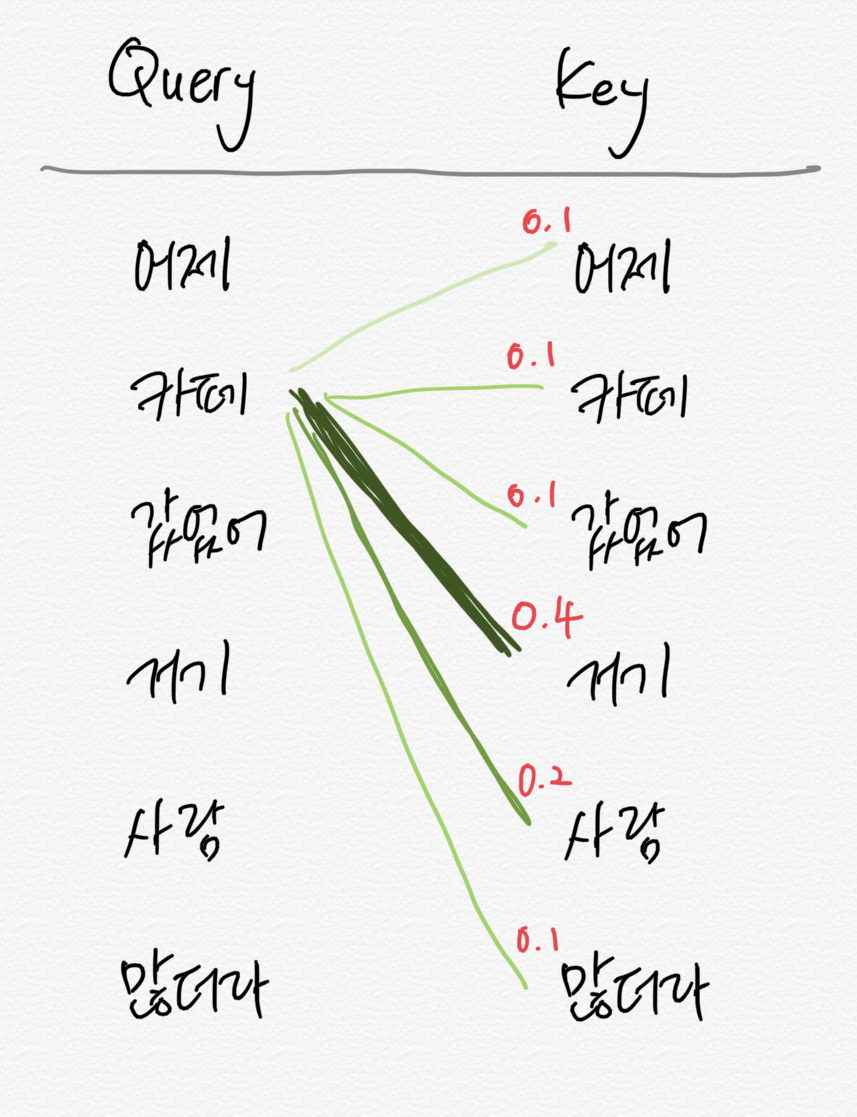
- 셀프 어텐션 모듈은 그림17과 같은 결과에 밸류 벡터들을 가중합(weighted sum)하는 방식으로 계산을 마무리
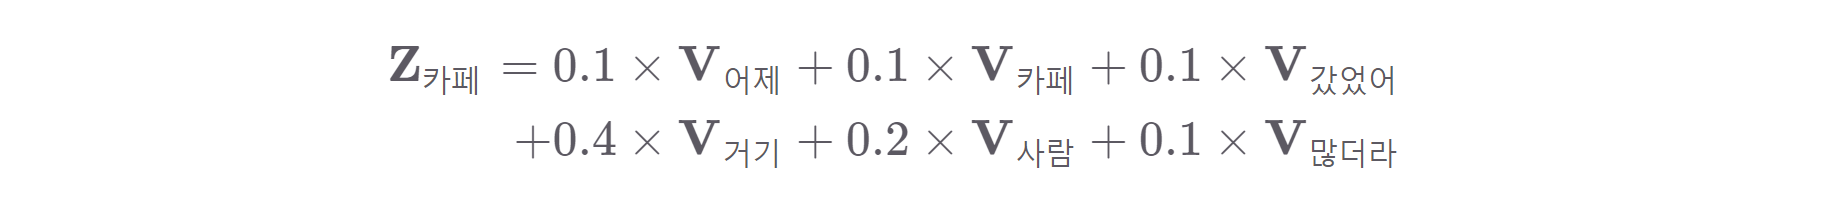

- 나머지 단어들도 셀프 어텐션을 각각 수행합니다. 모드 시퀀스를 대상으로 셀프 어텐션 계산이 끝나면 그 결과를 다음 블록으로 전달. 이처럼 트랜스포머 모델은 셀프 어텐션을 블록(레이어) 수만큼 반복